# Data Prep Exercise

__Note: This exercise is not shared with HDS trainees. It is here simply as reference__

## Preparations & Data Loading

### Loading all libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

from IPython.display import display,HTML
import pandas as pd
# import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# sns.set_style("ticks")
# sns.set_context(context="notebook",font_scale=1)

### Loading the relevant file

In [2]:
df1 = pd.read_csv('OK_Cupid_profiles.csv')

### First inspection of the data

In [3]:
display(df1.head(5))

,age,body_type,diet,drinks,drugs,education,height,income,job,last_online,orientation,pets,religion,gender,sign,smokes,status
0,22,a little extra,strictly anything,socially,never,working on college/university,75.0,-1,transportation,2012-06-28-20-30,straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,single
1,35,average,mostly other,often,sometimes,working on space camp,70.0,80000,hospitality / travel,2012-06-29-21-41,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,single
2,38,thin,anything,socially,NaN,graduated from masters program,68.0,-1,NaN,2012-06-27-09-10,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,available
3,23,thin,vegetarian,socially,NaN,working on college/university,71.0,20000,student,2012-06-28-14-22,straight,likes cats,NaN,m,pisces,no,single
4,29,athletic,NaN,socially,never,graduated from college/university,66.0,-1,artistic / musical / writer,2012-06-27-21-26,straight,likes dogs and likes cats,NaN,m,aquarius,no,single


In [4]:
display(df1.tail(5))

,age,body_type,diet,drinks,drugs,education,height,income,job,last_online,orientation,pets,religion,gender,sign,smokes,status
59939,59,NaN,NaN,socially,1,graduated from college/university,62.0,-1,sales / marketing / biz dev,2012-06-12-21-47,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,single
59940,24,fit,mostly anything,often,2,working on college/university,72.0,-1,entertainment / media,2012-06-29-11-01,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,single
59941,42,average,mostly anything,not at all,1,graduated from masters program,71.0,100000,construction / craftsmanship,2012-06-27-23-37,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,single
59942,27,athletic,mostly anything,socially,3,working on college/university,73.0,-1,medicine / health,2012-06-23-13-01,straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,single
59943,39,average,NaN,socially,NaN,graduated from masters program,68.0,-1,medicine / health,2012-06-29-00-42,gay,likes dogs and likes cats,catholicism and laughing about it,m,gemini and it&rsquo;s fun to think about,sometimes,single


#  Data issue exploration

## DATA ISSUE 1: Missing values - across columns

### Count the number of NA values by column

In [5]:
df1.isnull().sum(axis = 0)

age                0
body_type       5296
diet           24394
drinks          2985
drugs          14079
education       6628
height             3
income             0
job             8198
last_online        0
orientation        0
pets           19920
religion       20226
gender             0
sign           11056
smokes          5512
status             0
dtype: int64

## DATA ISSUE 2: Missing data - Income data

### Use a historigram to show the distribution of the income data

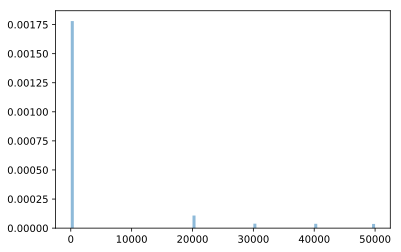

In [6]:
plt.hist(df1[df1.income<=50000]['income'].dropna(), bins = 100, alpha = 0.5, density=True)
plt.show()


## DATA ISSUE 3: Changing Scales - Height

### Let's start with checking whether the height distribution looks normal

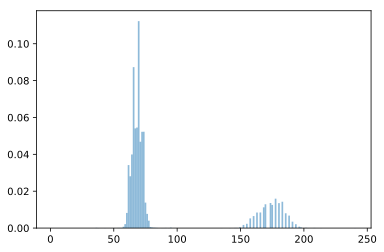

In [7]:
plt.hist(df1['height'].dropna(), bins = 180, alpha = 0.5, density=True)
plt.show()

### From the average heights for male and female and the graph above, it looks as if part of the heights has been entered in inches, and part of the heights has been entered in cm. Let's convert all to inches.

In [8]:
df1['cons_height'] = np.where(df1['height']>=100, df1['height']/2.54, df1['height'])

count    59941.000000
mean        68.298895
std          3.987246
min          1.000000
25%         66.000000
50%         68.110236
75%         71.000000
max         95.000000
Name: cons_height, dtype: float64

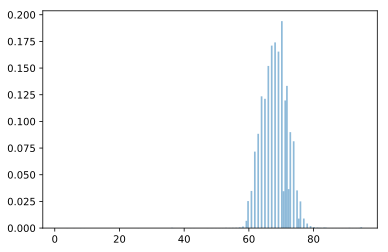

In [9]:
display(df1.cons_height.describe())
plt.hist(df1['cons_height'].dropna(), bins = 180, alpha = 0.5, density=True)
plt.show()

## DATA ISSUE 4: Drugs - change scale “never”, “sometimes”, “often” to respectively 1,2,3 

### Let's start with inspecting the data

In [10]:
display(pd.value_counts(df1['drugs'].values, sort=True))

never        22156
1            15567
sometimes     4562
2             3170
often          242
3              168
dtype: int64

## DATA ISSUE 5: Age outliers - Ignore people "older than" 99

### We start with inspecting the data

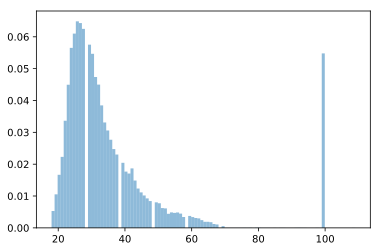

In [11]:
plt.hist(df1['age'].dropna(), bins = 100, alpha = 0.5, density=True)
plt.show()

## Height Distribution Check

C:\ML\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


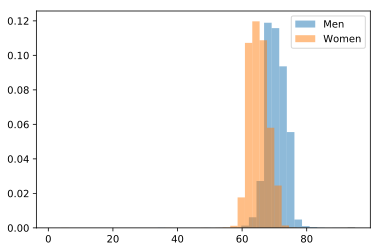

'Men average 70.44800808831876 in or 178.93794054432965 cm'

'Women average 65.10632761860876 in or 165.37007215126624 cm'

In [12]:
men_df = df1[df1['gender'] == 'm']
wom_df = df1[df1['gender'] == 'f']

plt.hist(men_df['cons_height'].dropna(), bins=40, alpha=0.5, label='Men', normed = True)
plt.hist(wom_df['cons_height'].dropna(), bins=40, alpha=0.5, label='Women', normed = True)
                
plt.legend(loc='upper right')
plt.show()

men_height = pd.to_numeric(men_df['cons_height'], errors='coerce').dropna()
wom_height = pd.to_numeric(wom_df['cons_height'], errors='coerce').dropna()

display("Men average {} in or {} cm".format(men_height.mean(), men_height.mean() * 2.54))
display("Women average {} in or {} cm".format(wom_height.mean(), wom_height.mean() * 2.54))


men_height = men_height[(men_height>56) & (men_height<82)]
wom_height = wom_height[(wom_height>56) & (wom_height<82)]

___What you should see:___

Both men and women who go online are magically 4 cm taller than average for cdc :)

(array([  66.,  167.,  802., 1064., 2189., 2631., 2888., 3681., 2614.,
        3352., 1641., 1543.,  779.,  373.,  194.,   53.,   23.,    4.,
           9.,    4.]),
 array([57.        , 58.00826772, 59.01653543, 60.02480315, 61.03307087,
        62.04133858, 63.0496063 , 64.05787402, 65.06614173, 66.07440945,
        67.08267717, 68.09094488, 69.0992126 , 70.10748031, 71.11574803,
        72.12401575, 73.13228346, 74.14055118, 75.1488189 , 76.15708661,
        77.16535433]),
 <a list of 20 Patch objects>)

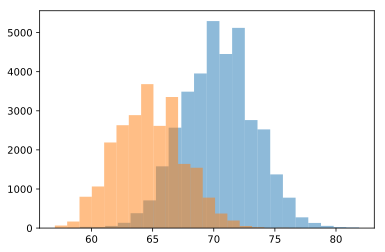

In [13]:
plt.hist(men_height, bins=23, alpha=0.5, label='Men')
plt.hist(wom_height, bins=20, alpha=0.5, label='Women')

___What we see___:
* Thnik we have some eager over-estimators here:
* Women peak is at 62" which is actually reasonable
* Men peak at 70 and 72" (nice round 6' ft choice)
 * Actual peak is at 68 to 70 (if we're really generous)
 * so a nice 2" bump for most men